## Problem 2.3 - Multinomial Logistic Regression - Application

In [13]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# truncate the colormap RdPu (I just do that for aesthetic reasons)
truncated_RdPu = LinearSegmentedColormap.from_list('truncated_RdPu', plt.cm.RdPu(np.linspace(0.3, 0.8, 100))) 

#### a) Generate data and train one with linear and one with logistic regression

In [15]:
# Generate data and split data into training and test sets
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
# train with linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

y_pred_linear_class = np.where(y_pred_linear >= 0.5, 1, 0)  # Converting to binary predictions 

In [ ]:
# train with logistic regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)

Logistic Regression test error: 0.000


In [18]:
# compare the two methods by providing error on the test set
linear_error = np.mean((y_test - y_pred_linear)**2) # Mean Squared Error for regression
linear_class_error = np.mean(y_test - y_pred_linear_class != 0 ) # Classification error for linear regression
logistic_error = np.mean(y_test != y_pred_logistic) # Classification error for logistic regression
print(f"Mean Squared Error (Linear Regression): {linear_error}")
print(f"Classification Error (Linear Regression): {linear_class_error}")
print(f"Classification Error (Logistic Regression): {logistic_error}")

Mean Squared Error (Linear Regression): 0.009403431660637252
Classification Error (Linear Regression): 0.0
Classification Error (Logistic Regression): 0.0


[]

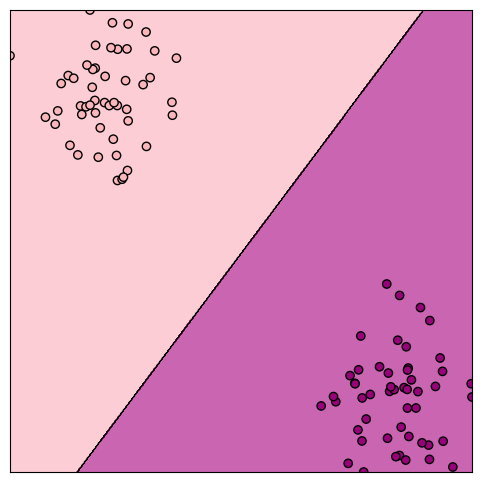

In [ ]:
# plot decision boundary of a method for logistic regression (Code snippet from the exercise sheet)
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot()
x0, x1 = np.meshgrid(
    np.linspace(X[:,0].min(), X[:,0].max(), 500).reshape(-1, 1),
    np.linspace(X[:,1].min(), X[:,1].max(), 500).reshape(-1, 1)
)
x_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = logistic_reg.predict(x_new)
zz = y_pred.reshape(x0.shape)

plt.contourf(x0, x1, zz, alpha = 0.6, cmap = truncated_RdPu)
plt.contour(x0, x1, zz, colors=['black'], linewidths=[0.4])
plt.scatter(X[:,0], X[:,1], c = y, edgecolors = 'k', cmap = truncated_RdPu)
ax.set_box_aspect(1)
ax.xaxis.set_tick_params(labelbottom = False)
ax.yaxis.set_tick_params(labelleft = False)
ax.set_xticks([])
ax.set_yticks([])

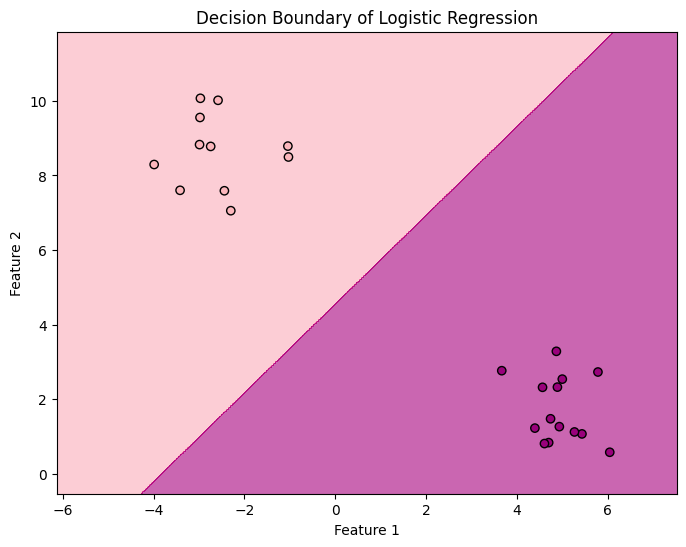

In [38]:
# plot decision boundary of a method for logistic regression (here only the test set is plotted)
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha = 0.6, cmap = truncated_RdPu)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolors = 'k', cmap = truncated_RdPu)
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()    

#### b) generate data with four labels and train logistic regression

Std: 0.5, C: 0.01, Classification Error: 0.0
Std: 0.5, C: 0.1, Classification Error: 0.0
Std: 0.5, C: 1, Classification Error: 0.0
Std: 0.5, C: 10, Classification Error: 0.0
Std: 0.5, C: 100, Classification Error: 0.0


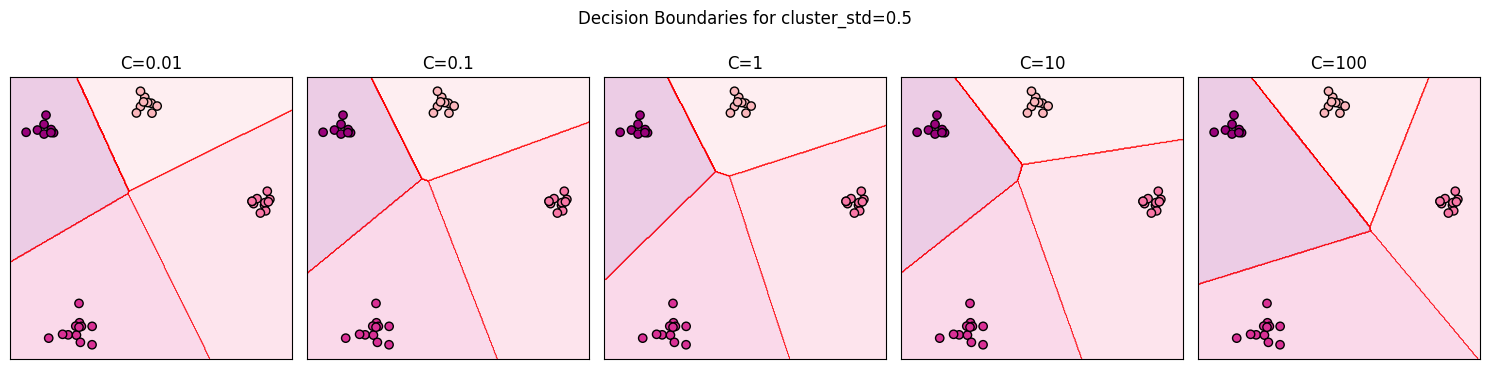

Std: 1.0, C: 0.01, Classification Error: 0.0
Std: 1.0, C: 0.1, Classification Error: 0.0
Std: 1.0, C: 1, Classification Error: 0.0
Std: 1.0, C: 10, Classification Error: 0.0
Std: 1.0, C: 100, Classification Error: 0.0


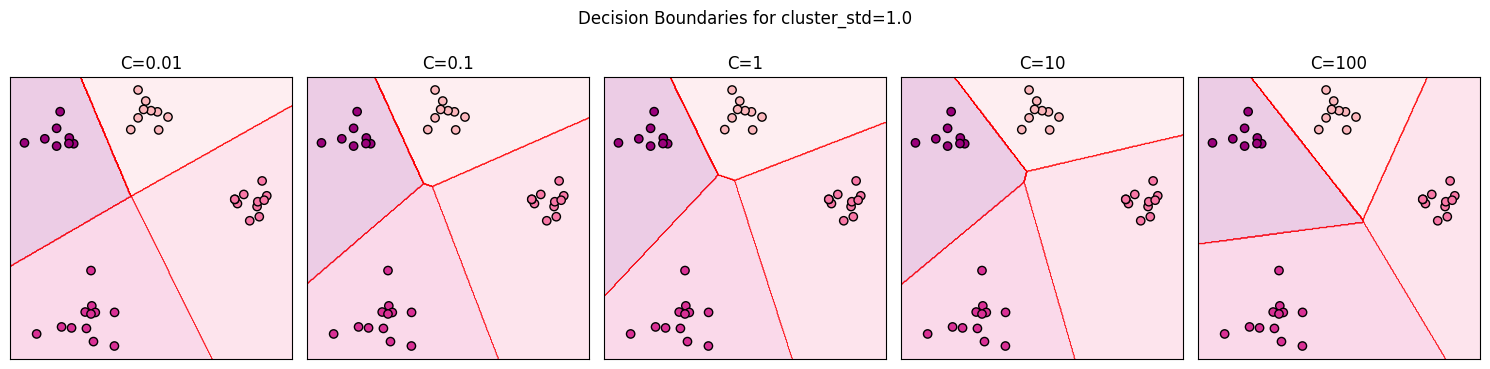

Std: 2.0, C: 0.01, Classification Error: 0.0
Std: 2.0, C: 0.1, Classification Error: 0.0
Std: 2.0, C: 1, Classification Error: 0.0
Std: 2.0, C: 10, Classification Error: 0.025
Std: 2.0, C: 100, Classification Error: 0.025


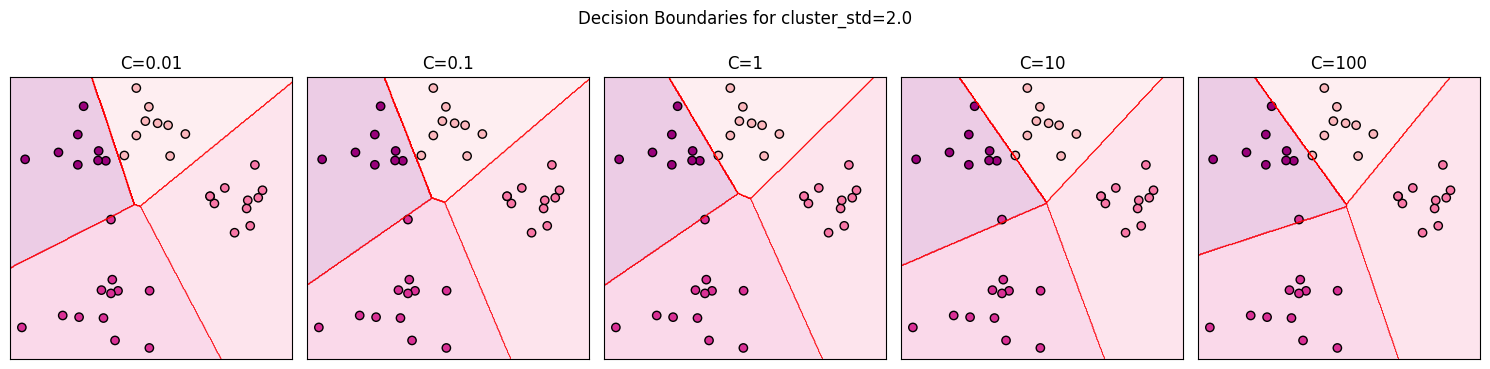

Std: 5.0, C: 0.01, Classification Error: 0.225
Std: 5.0, C: 0.1, Classification Error: 0.25
Std: 5.0, C: 1, Classification Error: 0.25
Std: 5.0, C: 10, Classification Error: 0.25
Std: 5.0, C: 100, Classification Error: 0.25


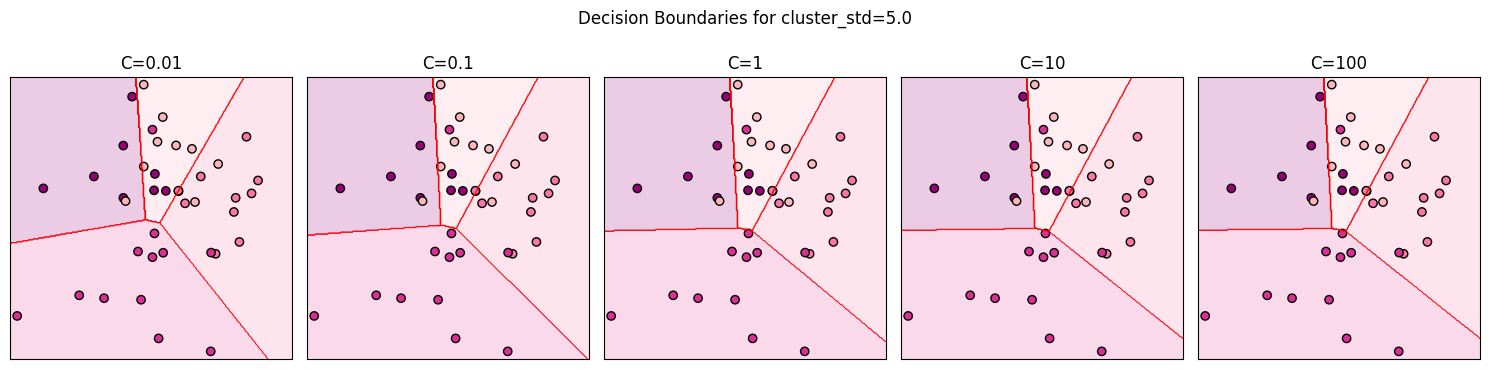

In [39]:
# generating data with four labels and vary in std values an train logistic regression with different regularization parameters C
std_values = [0.5, 1.0, 2.0, 5.0]
C_values = [0.01, 0.1, 1, 10, 100]
for std in std_values:
    X_multi, y_multi = make_blobs(n_samples = 200, centers = 4, cluster_std = std, random_state = 42)
    X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 42)

    fig, axes = plt.subplots(1, len(C_values), figsize=(15, 4))
    for i, C in enumerate(C_values):
        logistic_reg_multi = LogisticRegression(C = C)
        logistic_reg_multi.fit(X_train_multi, y_train_multi)
        y_pred_multi = logistic_reg_multi.predict(X_test_multi)
        multi_error = np.mean(y_test_multi != y_pred_multi)
        print(f"Std: {std}, C: {C}, Classification Error: {multi_error}")

        # plot decision boundary inspired by the code snippet from the exercise sheet
        ax = axes[i]
        x0, x1 = np.meshgrid(
            np.linspace(X_multi[:, 0].min() - 1, X_multi[:, 0].max() + 1, 300),
            np.linspace(X_multi[:, 1].min() - 1, X_multi[:, 1].max() + 1, 300)
        )
        X_grid = np.c_[x0.ravel(), x1.ravel()]
        y_grid = logistic_reg_multi.predict(X_grid).reshape(x0.shape)
        
        ax.contourf(x0, x1, y_grid, alpha=0.2, cmap=truncated_RdPu)
        ax.contour(x0, x1, y_grid, colors=['red'], linewidths=[0.4])
        ax.scatter(X_test_multi[:, 0], X_test_multi[:, 1], c=y_test_multi, cmap=truncated_RdPu, edgecolor='k')
        ax.set_title(f"C={C}")
        ax.set_box_aspect(1)
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.suptitle(f"Decision Boundaries for cluster_std={std}")
    plt.tight_layout()
    plt.show()
